In [1]:
(asdf:load-system :imago/jupyter)
(asdf:load-system :diff-boundary-corrfn)
(asdf:load-system :numpy-file-format)

T

T

T

In [13]:
;; Create a function which sums values of 6 random bell-shaped curves
(defparameter *field*
  (diff-boundary-corrfn/math:gaussian-field
    (diff-boundary-corrfn/math:random-gaussians 6)))

*FIELD*

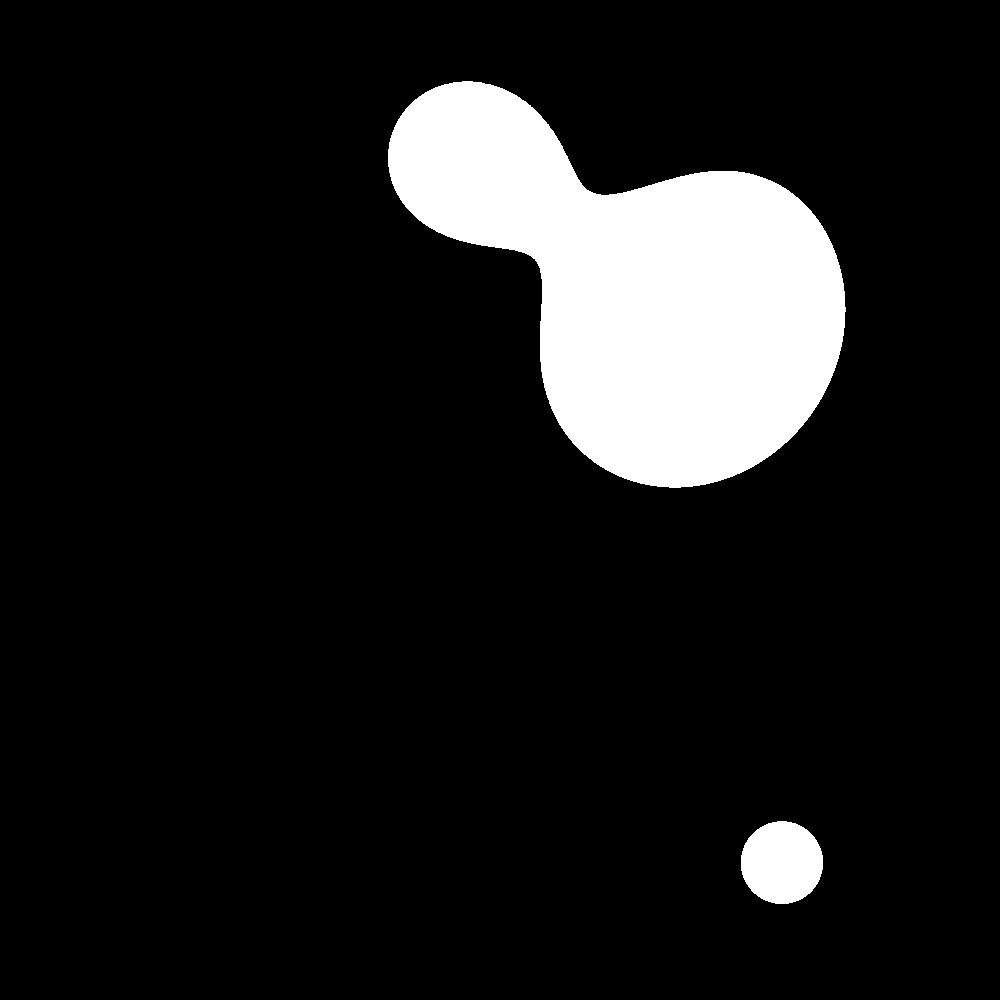

In [18]:
;; Evaluate it at points in uniform 3000x3000 grid and save an image
(let ((image (imago:make-binary-image-from-pixels
               (let ((descr (diff-boundary-corrfn:discretize-field 3000 *field*)))
                 (aops:vectorize* 'bit (descr) (if (> descr 5.0) 1 0))))))
  (imago:write-image image "/jails/julia/home/vasily/field.pbm")
  (imago-jupyter:show-image
    (imago:resize image 1000 1000)))

In [21]:
;; Calculate surface-surface function in a half-circle with radius R=0.1
;; Probably we need to disable division by zero trap because F_{ss} is ill-defined.
(time
  (defparameter *ss*
    (sb-int:with-float-traps-masked
      (:divide-by-zero)
      (let ((interface (diff-boundary-corrfn:interface *field* 5d0)))
        (diff-boundary-corrfn:surface-surface-at-dist interface 1d-1 100)))))

*SS*

Evaluation took:
  9.271 seconds of real time
  9.271930 seconds of total run time (9.271930 user, 0.000000 system)
  [ Run times consist of 0.021 seconds GC time, and 9.251 seconds non-GC time. ]
  100.01% CPU
  35,231,675,110 processor cycles
  10,559,427,168 bytes consed
  


In [22]:
;; Save results as a numpy array
(numpy-file-format:store-array
  (let ((ss (remove-if (lambda (x) (> (car x) 50)) *ss*)))
    (make-array (list (length ss) 3) :element-type 'double-float :initial-contents ss))
  "/jails/julia/home/vasily/ss-precise.npy")

NIL